### Wstęp do Uczenia Maszynowego 
##### Laboratorium 2

### 1. Podstawy drzew decyzyjnych - klasyfikacja

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
pima = pd.read_csv("pima.csv")

*Więcej o danych:* https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

### Kryterium podziału
a) wskaźnik błędu klasyfikacji (*classification error rate*) = udział obserwacji ze zbioru treningowego w danym regionie, które nie należą do przeważającej klasy.

$$E = 1 - max_{k}(\hat{p}_{mk}) $$

$\hat{p}_{mk}$ - proporcja obserwacji zbioru treningowego w m-tym regionie pochodząca z k-tej klasy

b) indeks Giniego

$$G = \sum_{k=1}^{K}\hat{p}_{mk}(1-\hat{p}_{mk})$$
Indeks Giniego przyjmuje małe wartości jeżeli $\hat{p}_{mk}$ jest bliski 0 lub 1. Z tego powodu indeks Giniego jest określany jako miara czystości węzła (*node purity*) - mała wartość wskazuje, że węzeł zawiera głównie obserwacje z jednej klasy.

c) entropia

$$D = - \sum_{k=1}^{K}\hat{p}_{mk}log\hat{p}_{mk}$$

$0 \leq \hat{p}_{mk} \leq 1 \ \rightarrow 0 \leq -\hat{p}_{mk}log\hat{p}_{mk}$

Podobnie jak indeks Giniego przyjmuje małe wartości (bliskie zero) gdy $\hat{p}_{mk}$ jest bliskie 0 lub 1.

Dokumentacja:
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

##### *Zadanie 1*
------------------------

Przygotuj zbiór danych `pima` do dalszej pracy. Podziel na *X* i *y*, a następnie na zbiór treningowy i testowy w proporcji 7:3.

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


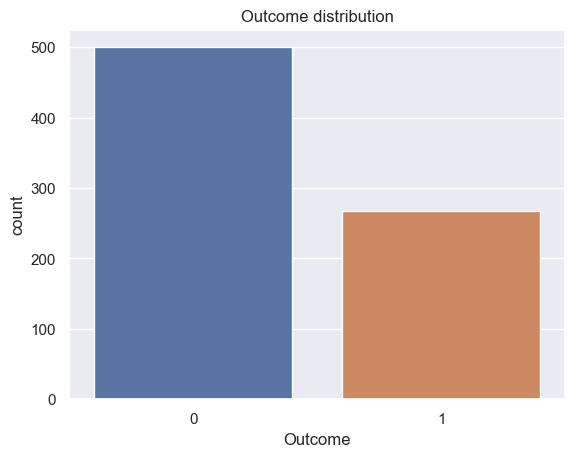

In [6]:
plt.figure()
sns.countplot(data=pima, x='Outcome')
plt.title('Outcome distribution')
plt.show()

In [7]:
X = pima.drop('Outcome', axis=1)
y = pima['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
429,1,95,82,25,180,35.0,0.233,43
524,3,125,58,0,0,31.6,0.151,24
212,7,179,95,31,0,34.2,0.164,60
558,11,103,68,40,0,46.2,0.126,42
66,0,109,88,30,0,32.5,0.855,38


In [9]:
y_train.head()

429    1
524    0
212    0
558    0
66     1
Name: Outcome, dtype: int64

##### *Zadanie 2*
---------------
Zbuduj model drzewa dla danych z *Zadania 1*.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5714946546052632, 0.9722222222222222, 'x[1] <= 154.5\ngini = 0.446\nsamples = 537\nvalue = [357, 180]'),
 Text(0.23180509868421054, 0.9166666666666666, 'x[5] <= 26.35\ngini = 0.384\nsamples = 456\nvalue = [338, 118]'),
 Text(0.05263157894736842, 0.8611111111111112, 'x[7] <= 59.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.02631578947368421, 0.8055555555555556, 'x[6] <= 0.675\ngini = 0.02\nsamples = 101\nvalue = [100, 1]'),
 Text(0.013157894736842105, 0.75, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.039473684210526314, 0.75, 'x[6] <= 0.688\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.02631578947368421, 0.6944444444444444, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05263157894736842, 0.6944444444444444, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.07894736842105263, 0.8055555555555556, 'x[6] <= 0.343\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.06578947368421052, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text

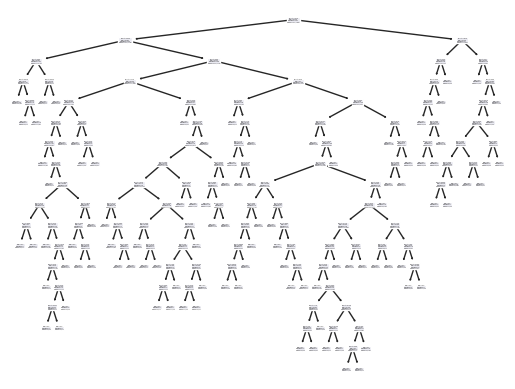

In [12]:
tree.plot_tree(model)

#### Macierz pomyłek (*ang. confusion matrix*)

<img src="confusion_matrix.png"  width="500"/>

In [13]:
from sklearn.metrics import confusion_matrix

##### *Zadanie 3*
-----------------
Wyznacz macierz pomyłek dla predykcji na danych treningowych.

In [14]:
y_train_pred = model.predict(X_train)

confusion_matrix(y_train, y_train_pred)

array([[357,   0],
       [  0, 180]], dtype=int64)

In [15]:
y_test_pred = model.predict(X_test)

confusion_matrix(y_test, y_test_pred)

array([[107,  36],
       [ 34,  54]], dtype=int64)

Jak odczytać powstałą macierz pomyłek w pakiecie `scikit-learn`?

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 


In [16]:
# tp, fp, fn, tn = 55, 32, 33, 111
# accuracy = 0.7186
# recall = 0.625
# precision = 0.632

##### *Zadanie 4*
-------------
Policz następujące miary dla otrzymanych predykcji na zbiorze treningowym.

a) dokładność (*accuracy*)

b) czułość (*sensitivity, recall*)

c) precyzja (*precision*)

d) F1-score 

Powtórz obliczenia dla zbioru testowego.

In [17]:
from sklearn.metrics import (accuracy_score, recall_score,
                             precision_score, f1_score) 

In [18]:
# a)
print(f"Accuracy for train: {accuracy_score(y_train, y_train_pred)}")
print(f"Accuracy for test: {accuracy_score(y_test, y_test_pred)}")

Accuracy for train: 1.0
Accuracy for test: 0.696969696969697


In [19]:
# b)
print(f"Recall for train: {recall_score(y_train, y_train_pred)}")
print(f"Recall for test: {recall_score(y_test, y_test_pred)}")

Recall for train: 1.0
Recall for test: 0.6136363636363636


In [20]:
# c)
print(f"Precision for train: {precision_score(y_train, y_train_pred)}")
print(f"Precision for test: {precision_score(y_test, y_test_pred)}")

Precision for train: 1.0
Precision for test: 0.6


In [21]:
# d)
print(f"F1-score for train: {f1_score(y_train, y_train_pred)}")
print(f"F1-score for test: {f1_score(y_test, y_test_pred)}")

F1-score for train: 1.0
F1-score for test: 0.6067415730337078


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       357
           1       1.00      1.00      1.00       180

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       143
           1       0.60      0.61      0.61        88

    accuracy                           0.70       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.70      0.70      0.70       231



### Zbiór walidaycjny?

##### *Zadanie 5*
-------------
Podziel zbiór `pima` na zbiór treningowy, walidacyjny i testowy (6:2:2).

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [26]:
Tree = tree.DecisionTreeClassifier(random_state=0)
path = Tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [29]:
ccp_alphas

array([0.        , 0.00163043, 0.00186335, 0.00186335, 0.00195652,
       0.00195652, 0.00207039, 0.00211516, 0.00212089, 0.00253623,
       0.00255694, 0.00289855, 0.00289855, 0.00313299, 0.00316036,
       0.00326087, 0.00326087, 0.00331263, 0.00347826, 0.00357382,
       0.00372671, 0.00386473, 0.00387785, 0.00393933, 0.00397552,
       0.00434596, 0.00438289, 0.00449866, 0.00499519, 0.00535901,
       0.00560489, 0.0057971 , 0.00583611, 0.00593643, 0.00642745,
       0.00655863, 0.00690836, 0.00695652, 0.00811594, 0.00943755,
       0.0102569 , 0.01096811, 0.01193084, 0.01330398, 0.02014615,
       0.07797585])

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [33]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0016304347826086956, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018633540372670811, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018633540372670811, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0019565217391304354, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0019565217391304354, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0020703933747412014, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0021151586368977696, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0021208907741251336, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0025362318840579713, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002556935817805384, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002898550724637681, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002898550724637681, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0031329923273657285, random_state=0),


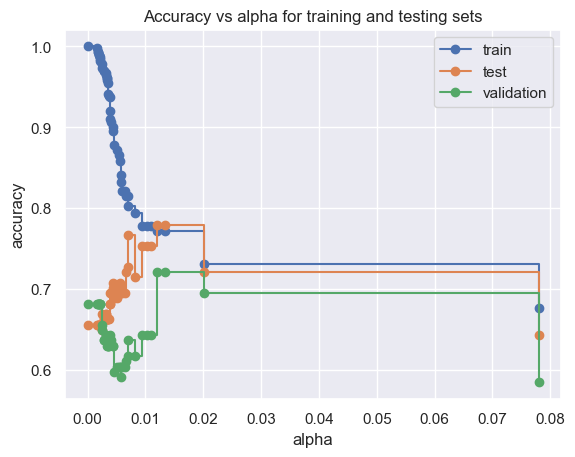

In [35]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
val_scores = [clf.score(X_val, y_val) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [36]:
alpha_opt = max(ccp_alphas[val_scores == max(val_scores)])